In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
def vgg16(input_shape = (244,244,3)):
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Conv2D(input_shape=input_shape, filters = 64, kernel_size=(3,3), strides = (1,1), activation= 'relu', padding = 'same'))
  model.add(tf.keras.layers.Conv2D(filters= 64, kernel_size = (3,3), strides= (1,1), activation='relu', padding='same'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

  model.add(tf.keras.layers.Conv2D(filters= 128, kernel_size = (3,3), strides= (1,1), activation='relu', padding='same'))
  model.add(tf.keras.layers.Conv2D(filters= 128, kernel_size = (3,3), strides= (1,1), activation='relu', padding='same'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

  model.add(tf.keras.layers.Conv2D(filters= 256, kernel_size = (3,3), strides= (1,1), activation='relu', padding='same'))
  model.add(tf.keras.layers.Conv2D(filters= 256, kernel_size = (3,3), strides= (1,1), activation='relu', padding='same'))
  model.add(tf.keras.layers.Conv2D(filters= 256, kernel_size = (3,3), strides= (1,1), activation='relu', padding='same'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

  model.add(tf.keras.layers.Conv2D(filters= 512, kernel_size = (3,3), strides= (1,1), activation='relu', padding='same'))
  model.add(tf.keras.layers.Conv2D(filters= 512, kernel_size = (3,3), strides= (1,1), activation='relu', padding='same'))
  model.add(tf.keras.layers.Conv2D(filters= 512, kernel_size = (3,3), strides= (1,1), activation='relu', padding='same'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

  model.add(tf.keras.layers.Conv2D(filters= 512, kernel_size = (3,3), strides= (1,1), activation='relu', padding='same'))
  model.add(tf.keras.layers.Conv2D(filters= 512, kernel_size = (3,3), strides= (1,1), activation='relu', padding='same'))
  model.add(tf.keras.layers.Conv2D(filters= 512, kernel_size = (3,3), strides= (1,1), activation='relu', padding='same'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(4096, activation='relu'))
  model.add(tf.keras.layers.Dense(4096, activation='relu'))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))

  return model

In [ ]:
vgg_cifar10 = vgg16(input_shape = (32, 32, 3))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
vgg_cifar10.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

vgg_cifar10.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=123)

In [ ]:
y_train = tf.squeeze(tf.one_hot(y_train, 10), axis=1)
y_valid = tf.squeeze(tf.one_hot(y_valid, 10), axis=1)
y_test = tf.squeeze(tf.one_hot(y_test, 10), axis=1)

In [ ]:
history = vgg_cifar10.fit(x_train, y_train, batch_size=40, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
1000/1000 [==============================] - 38s 38ms/step - loss: 2.4610 - acc: 0.1009 - val_loss: 2.3028 - val_acc: 0.0950
Epoch 2/20
1000/1000 [==============================] - 37s 37ms/step - loss: 2.3028 - acc: 0.0981 - val_loss: 2.3027 - val_acc: 0.0971
Epoch 3/20
1000/1000 [==============================] - 37s 37ms/step - loss: 2.3027 - acc: 0.0985 - val_loss: 2.3030 - val_acc: 0.0950
Epoch 4/20
1000/1000 [==============================] - 37s 37ms/step - loss: 2.3028 - acc: 0.0980 - val_loss: 2.3030 - val_acc: 0.0993
Epoch 5/20
1000/1000 [==============================] - 37s 37ms/step - loss: 2.3027 - acc: 0.0972 - val_loss: 2.3030 - val_acc: 0.0971
Epoch 6/20
1000/1000 [==============================] - 37s 37ms/step - loss: 2.3027 - acc: 0.1003 - val_loss: 2.3029 - val_acc: 0.0971
Epoch 7/20
1000/1000 [==============================] - 37s 37ms/step - loss: 2.3027 - acc: 0.0984 - val_loss: 2.3027 - val_acc: 0.0970
Epoch 8/20
1000/1000 [==========================

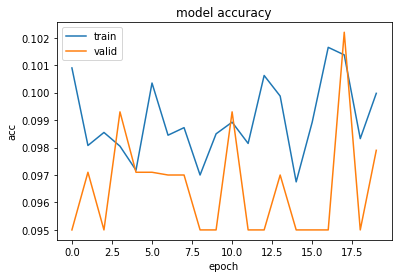

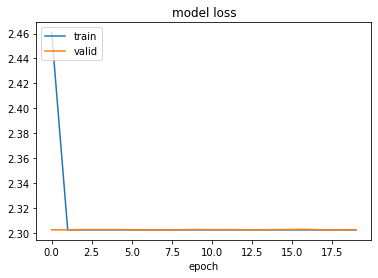

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.legend(['train','valid'], loc='upper left')
plt.show()

In [ ]:
vgg_cifar10 = vgg16(input_shape = (32, 32, 3))

opt = tf.keras.optimizers.Adam(learning_rate=0.05)
vgg_cifar10.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

vgg_cifar10.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 256)        

In [23]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

imgs = np.load('drive/MyDrive/imgs.npy')
labels = np.load('drive/MyDrive/labels.npy')

print(imgs.shape)
print(labels.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(1080, 299, 299, 3)
(1080,)


In [25]:
import cv2
print(cv2.__version__)

#resize (299, 299) -> (32, 32)
x_train = []
for idx in range(len(imgs)):
  print('\r start', idx+1, '/', len(imgs), end='')
  img = imgs[idx]
  img = cv2.resize(img, (32, 32))
  x_train.append(img)
print() #end

x_train = np.array(x_train)
print(x_train.shape)

4.1.2
 start 1080 / 1080
(1080, 32, 32, 3)


In [26]:
base_model = tf.keras.applications.ResNet50(weights=None, input_shape=(32, 32, 3))
base_model = tf.keras.models.Model(base_model.inputs, base_model.layers[-2].output)
x = base_model.output
pred = tf.keras.layers.Dense(9, activation='softmax')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=pred)

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "functional_25"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_8[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________

In [28]:
y_train = np.reshape(labels, newshape=(len(labels), 1))

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=123)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=123)

In [29]:
y_train = tf.squeeze(tf.one_hot(y_train, 9), axis=1)
y_valid = tf.squeeze(tf.one_hot(y_valid, 9), axis=1)
y_test = tf.squeeze(tf.one_hot(y_test, 9), axis=1)

In [35]:
history = model.fit(x=x_train, y=y_train, batch_size=40, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
18/18 [==============================] - 1s 73ms/step - loss: 0.4702 - acc: 0.8871 - val_loss: 2.4851 - val_acc: 0.3843
Epoch 2/20
18/18 [==============================] - 1s 41ms/step - loss: 0.2008 - acc: 0.9465 - val_loss: 2.4848 - val_acc: 0.4306
Epoch 3/20
18/18 [==============================] - 1s 40ms/step - loss: 0.1369 - acc: 0.9522 - val_loss: 2.7435 - val_acc: 0.4491
Epoch 4/20
18/18 [==============================] - 1s 40ms/step - loss: 0.1057 - acc: 0.9682 - val_loss: 2.5846 - val_acc: 0.4583
Epoch 5/20
18/18 [==============================] - 1s 40ms/step - loss: 0.2759 - acc: 0.9334 - val_loss: 2.8824 - val_acc: 0.4167
Epoch 6/20
18/18 [==============================] - 1s 40ms/step - loss: 0.2766 - acc: 0.9175 - val_loss: 2.9400 - val_acc: 0.4306
Epoch 7/20
18/18 [==============================] - 1s 41ms/step - loss: 0.4137 - acc: 0.9219 - val_loss: 4.1755 - val_acc: 0.3056
Epoch 8/20
18/18 [==============================] - 1s 40ms/step - loss: 1.1709 - a

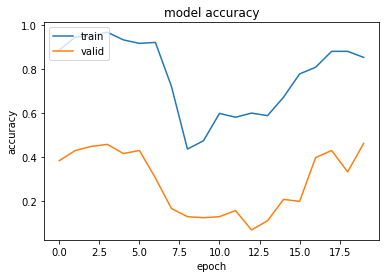

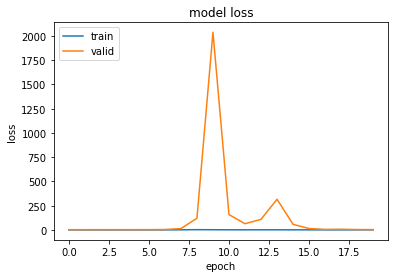

In [36]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [37]:
results = model.evaluate(x_test, y_test, batch_size=40)

5/5 [==============================] - 0s 8ms/step - loss: 2.6788 - acc: 0.4451


# 새 섹션

In [39]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [41]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=123)

In [42]:
y_train = tf.squeeze(tf.one_hot(y_train, 10), axis=1)
y_valid = tf.squeeze(tf.one_hot(y_valid, 10), axis=1)
y_test = tf.squeeze(tf.one_hot(y_test, 10), axis=1)

In [43]:
base_model = tf.keras.applications.InceptionV3(weights=None, input_shape=(75, 75, 3))
base_model = tf.keras.models.Model(base_model.inputs, base_model.layers[-2].output)
x = base_model.output
pred = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=pred)

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "functional_29"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 37, 37, 32)   864         input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 37, 37, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 37, 37, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________

In [44]:
x_data = []
for i in range(len(x_train)):
  img = cv2.resize(x_train[i], (75, 75))
  x_data.append(img)

x_train = np.array(x_data)

x_data = []
for i in range(len(x_valid)):
  img = cv2.resize(x_valid[i], (75, 75))
  x_data.append(img)

x_valid = np.array(x_data)

x_data = []
for i in range(len(x_test)):
  img = cv2.resize(x_test[i], (75, 75))
  x_data.append(img)

x_test = np.array(x_data)

In [45]:
base_model = tf.keras.applications.InceptionV3(weights=None, input_shape=(75, 75, 3))
base_model = tf.keras.models.Model(base_model.inputs, base_model.layers[-2].output)
x = base_model.output
pred = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=pred)

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "functional_33"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 37, 37, 32)   864         input_10[0][0]                   
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 37, 37, 32)   96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 37, 37, 32)   0           batch_normalization_94[0][0]     
______________________________________________________________________________________

In [46]:
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1250/1250 [==============================] - 67s 54ms/step - loss: 1.9677 - acc: 0.3150 - val_loss: 12.8563 - val_acc: 0.1450
Epoch 2/10
1250/1250 [==============================] - 65s 52ms/step - loss: 1.9938 - acc: 0.2941 - val_loss: 29.3216 - val_acc: 0.2154
Epoch 3/10
1250/1250 [==============================] - 65s 52ms/step - loss: 1.8140 - acc: 0.3574 - val_loss: 5.4141 - val_acc: 0.1958
Epoch 4/10
1250/1250 [==============================] - 65s 52ms/step - loss: 1.6947 - acc: 0.4081 - val_loss: 6.5108 - val_acc: 0.2429
Epoch 5/10
1250/1250 [==============================] - 65s 52ms/step - loss: 1.5202 - acc: 0.4852 - val_loss: 1.7913 - val_acc: 0.4060
Epoch 6/10
1250/1250 [==============================] - 64s 52ms/step - loss: 1.5814 - acc: 0.4652 - val_loss: 1.7256 - val_acc: 0.4518
Epoch 7/10
1250/1250 [==============================] - 64s 51ms/step - loss: 1.2994 - acc: 0.5602 - val_loss: 1.2092 - val_acc: 0.5835
Epoch 8/10
1250/1250 [========================

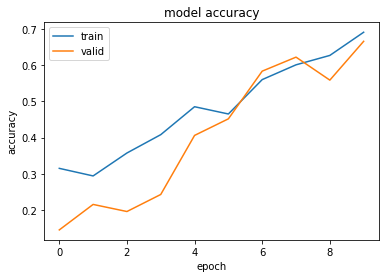

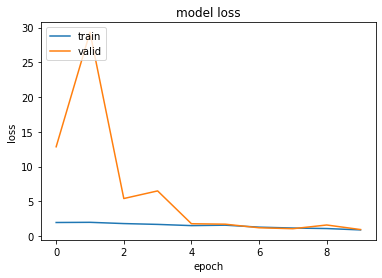

In [47]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [48]:
results = model.evaluate(x_test, y_test, batch_size=32)

313/313 [==============================] - 5s 15ms/step - loss: 0.9372 - acc: 0.6701


In [50]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

169009152/169001437 [==============================] - 3s 0us/step


In [51]:
base_model = tf.keras.applications.ResNet50(weights=None, input_shape=(32, 32, 3))
base_model = tf.keras.models.Model(base_model.inputs, base_model.layers[-2].output)
x = base_model.output
pred = tf.keras.layers.Dense(100, activation='softmax')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=pred)

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "functional_37"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_11[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________

In [52]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=123)

In [53]:
y_train = tf.squeeze(tf.one_hot(y_train, 100), axis=1)
y_valid = tf.squeeze(tf.one_hot(y_valid, 100), axis=1)
y_test = tf.squeeze(tf.one_hot(y_test, 100), axis=1)

In [79]:
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=5, validation_data=(x_valid, y_valid))

Epoch 1/5
1250/1250 [==============================] - 47s 38ms/step - loss: 0.1274 - acc: 0.9605 - val_loss: 8.7216 - val_acc: 0.2960
Epoch 2/5
1250/1250 [==============================] - 47s 37ms/step - loss: 0.1321 - acc: 0.9592 - val_loss: 9.1382 - val_acc: 0.2901
Epoch 3/5
1250/1250 [==============================] - 47s 37ms/step - loss: 0.1391 - acc: 0.9572 - val_loss: 12.7193 - val_acc: 0.2810
Epoch 4/5
1250/1250 [==============================] - 47s 37ms/step - loss: 0.1341 - acc: 0.9591 - val_loss: 12.2946 - val_acc: 0.2733
Epoch 5/5
1250/1250 [==============================] - 47s 37ms/step - loss: 0.1404 - acc: 0.9574 - val_loss: 8.2029 - val_acc: 0.2939


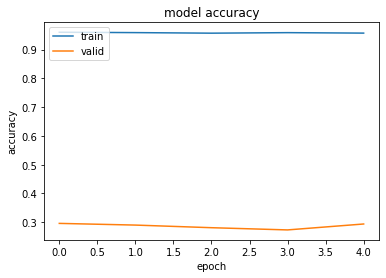

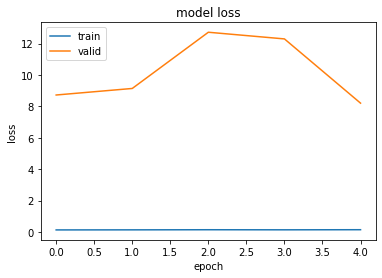

In [80]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [81]:
import numpy as np

print('validation accuracy')
print(history.history['val_acc'][-1])
print(np.max(history.history['val_acc']))

results = model.evaluate(x_test, y_test, batch_size=40)

print('test accuracy')
print(results[1])

validation accuracy
0.2939000129699707
0.29600000381469727
250/250 [==============================] - 2s 10ms/step - loss: 8.0751 - acc: 0.2952
test accuracy
0.295199990272522
